<a href="https://colab.research.google.com/github/gkckdals3/ML_/blob/main/%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C(train_data%20%EC%A0%84%EC%B2%B4%20%ED%95%99%EC%8A%B5)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

In [ ]:
import glob
from google.colab import drive
import pandas as pd
drive.mount('/gdrive', force_remount=True)
#train 타겟값 target에 저장
target_table=pd.read_csv('/gdrive/MyDrive/SyntekaBio/train_output.csv').to_numpy()
target=target_table[:,1:].astype(float)
train_data =(sorted(glob.glob('/gdrive/MyDrive/SyntekaBio/train/PNG/*.png')))

Mounted at /gdrive


In [ ]:
#전체 데이터 불러오기/데이터 10분에 1로 축소
for i in range (len(train_data)):
  train_data[i]=cv2.imread(train_data[i])
  train_data[i]=cv2.resize(train_data[i],dsize=(128, 128),interpolation=cv2.INTER_AREA)
  train_data[i]=train_data[i].astype(np.float32)/255
train_scaled=np.array(train_data)
train_data=np.array(train_data)

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,target,test_size=0.2,random_state=5)
print('학습 데이터 shape : ', train_scaled.shape)
print('검증 데이터 shape : ', val_scaled.shape)
print('학습 타겟 shape : ', train_target.shape)
print('검증 타겟 shape : ', val_target.shape)

학습 데이터 shape :  (400, 128, 128, 3)
검증 데이터 shape :  (101, 128, 128, 3)
학습 타겟 shape :  (400, 1)
검증 타겟 shape :  (101, 1)


In [ ]:
import keras
model = keras.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(padding='SAME'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 508032)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               130056448 
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

In [ ]:
import tensorflow
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer = Adam(learning_rate=0.001), 
              metrics=['accuracy'])


In [ ]:
history = model.fit(
            train_scaled, train_target, 
            validation_data = (val_scaled,val_target),
            batch_size = 32,
            epochs = 30
           
                    )

Epoch 1/30
13/13 [==============================] - 1s 49ms/step - loss: 100.6710 - accuracy: 0.5275 - val_loss: 22.2788 - val_accuracy: 0.6634
Epoch 2/30
13/13 [==============================] - 0s 35ms/step - loss: 29.9234 - accuracy: 0.5250 - val_loss: 12.2980 - val_accuracy: 0.6634
Epoch 3/30
13/13 [==============================] - 0s 34ms/step - loss: 16.9701 - accuracy: 0.5475 - val_loss: 19.8017 - val_accuracy: 0.3366
Epoch 4/30
13/13 [==============================] - 0s 34ms/step - loss: 13.0030 - accuracy: 0.5850 - val_loss: 4.8656 - val_accuracy: 0.6634
Epoch 5/30
13/13 [==============================] - 0s 36ms/step - loss: 6.1857 - accuracy: 0.6400 - val_loss: 2.3620 - val_accuracy: 0.3366
Epoch 6/30
13/13 [==============================] - 0s 34ms/step - loss: 5.0975 - accuracy: 0.6275 - val_loss: 2.3255 - val_accuracy: 0.6634
Epoch 7/30
13/13 [==============================] - 0s 35ms/step - loss: 2.7569 - accuracy: 0.6625 - val_loss: 0.6276 - val_accuracy: 0.7228
Epoch

In [ ]:
model.evaluate(val_scaled,val_target)

4/4 [==============================] - 0s 10ms/step - loss: 0.1450 - accuracy: 0.9703


[0.1450355052947998, 0.9702970385551453]

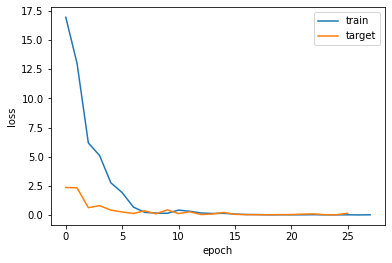

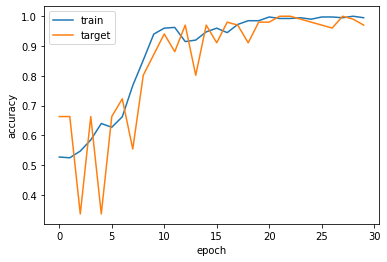

In [ ]:
import matplotlib.pyplot as plt
plt.plot((history.history['loss'][2:]))
plt.plot((history.history['val_loss'][4:]))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','target'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','target'])

plt.show()

In [ ]:
history= model.fit(
            train_data,target, 
            batch_size = 32,
            epochs = 28
                    )

Epoch 1/28
16/16 [==============================] - 5s 34ms/step - loss: 113.5491 - accuracy: 0.5409
Epoch 2/28
16/16 [==============================] - 0s 30ms/step - loss: 34.5714 - accuracy: 0.5768
Epoch 3/28
16/16 [==============================] - 0s 30ms/step - loss: 15.3578 - accuracy: 0.5968
Epoch 4/28
16/16 [==============================] - 0s 30ms/step - loss: 11.7948 - accuracy: 0.5888
Epoch 5/28
16/16 [==============================] - 0s 30ms/step - loss: 9.2255 - accuracy: 0.5409
Epoch 6/28
16/16 [==============================] - 0s 30ms/step - loss: 3.3810 - accuracy: 0.6208
Epoch 7/28
16/16 [==============================] - 0s 30ms/step - loss: 2.1006 - accuracy: 0.6267
Epoch 8/28
16/16 [==============================] - 0s 30ms/step - loss: 1.2213 - accuracy: 0.7206
Epoch 9/28
16/16 [==============================] - 0s 30ms/step - loss: 0.5550 - accuracy: 0.8583
Epoch 10/28
16/16 [==============================] - 0s 30ms/step - loss: 0.3519 - accuracy: 0.9142
Epoc

In [ ]:
test_target_table=pd.read_csv('/gdrive/MyDrive/SyntekaBio/test_output_sample.csv').to_numpy()
test_target=target_table[:,1:].astype(float)
test_data =(sorted(glob.glob('/gdrive/MyDrive/SyntekaBio/test/PNG/*.png')))

In [ ]:
for i in range (len(test_data)):
  test_data[i]=cv2.imread(test_data[i])
  test_data[i]=cv2.resize(test_data[i],dsize=(128, 128),interpolation=cv2.INTER_AREA).astype(np.float32)/255
test_scaled=np.array(test_data)

In [ ]:
test_scaled.shape

(126, 128, 128, 3)

In [ ]:
pred=(model.predict(test_scaled))
pred[1:3]

array([[9.999845e-01],
       [8.835311e-06]], dtype=float32)

In [ ]:
def binary_classification(self):
  for i in range (len(self)):
    if pred[i]<0.5:
      pred[i]=int(0)
    else:
      pred[i]=int(1)

In [ ]:
binary_classification(pred)

In [ ]:
test_target=pd.read_csv('/gdrive/MyDrive/SyntekaBio/test_output_sample.csv')
test_target.iloc[:,1]=pred
test_target

,Sample ID,Control:0/Case:1
0,AZ-004,1.0
1,AZ-005,1.0
2,AZ-018,0.0
3,AZ-020,1.0
4,AZ-021,0.0
...,...,...
121,AZ-779,0.0
122,AZ-783,1.0
123,AZ-795,1.0
124,AZ-800,1.0


In [ ]:
test_target.to_csv('/gdrive/MyDrive/SyntekaBio/test_target.csv',index=False)